# **Recurrent Neural Networks (RNN)**

* Recurrent Neural Networks (RNN) are a type of Neural
Network where the **output from the previous step is fed as input to the current** **step**.
* For processing **sequential data; time series, speech, text,audio, video etc.**
* **Remembers inputs due to an internal memory** which
helps in predicting what comes next
* The information cycles through a loop.
* While making decision, **it considers the current input and**
**also what it has learned from the past inputs**, i.e., **RNN**
**adds the immediate past to the present.**

# **Applications**
* Spam classification
* Sentiment analysis
* Language translation
* Time series data processing eg: Sales
forecasting

An optimizer is used to reduce the loss function, so that y' matches with y

    w'' is updated using w''= w'' - learning rate loss\w''

When slope is negative, weight gets increased
and vice-versa.
* **Learning rate decides the rate at which the weight gets updated**.

If the loss is not
converging, it means there is some problem
with the learning rate or the derivative term

# **Chain rule updation**

      

**Updation of W'**:

     W new' = W old' - L\W old'

**Updation of W**:

     W new = W old - L\W old

# **Vanishing gradient problem**:

* The gradient will be vanishingly small, effectively
preventing the weight from changing its value while using
**sigmoid activation function**.
* RNNs suffer from the problem of vanishing
gradients, which **hampers learning of long data**
**sequences**. The gradients carry information used in
the RNN parameter update and when the gradient
becomes smaller and smaller, the parameter updates
become insignificant which means **no real learning is done**.

# **LSTM (Long Short Term Memory) Network**:

**Problem of long term dependencies**:

 RNNs can connect previous information to the present
task. It is fine when the gap between the relevant
information and the place where it is needed is small.
But it is possible that the gap between the relevant
information and the point where it is needed is large. As
the gap grows, RNN becomes unable to learn to connect
the information.


# **LSTM**
* It is a special kind of RNN capable of learning long term
dependencies.
* **Instead of a single neural network layer, there are 4 interacting**
**layers: a cell state (which is the memory of the LSTM cell) and 3**
**gates that update and control the cell states**.
* **The gates use tanh and sigmoid activation functions**.
* The horizontal line running through the top is the **cell state** which
runs straight down the entire chain, with some **minor linear interactions**.
* LSTM can add or remove information to the cell state through
structures called **gates**. They optionally let information through.
**They consists of a sigmoid(0-1) neural net layer and a point wise**
**multiplication operation**.
* The output of sigmoid layer is values between 0 and 1; 0 meaning
**‘let nothing’ and 1 meaning ‘let everything’.**

# **Gate layers in LSTM and steps in processing**
* **Step 1/Layer 1/Gate 1**:

**Forget gate layer**:

A sigmoid layer that decides **what information**
**needs to be kept and what needs to be thrown out**. **It controls what**
**information in the cell state needs to be forgot**.

* **Step 2/ Layer 2/ Gate 2**:

Decides what new informations going to be stored in the cell state.

**It has 2 parts:**

1. A **sigmoid Layer** called the **input gate layer** decides which values we  update.
2. A **tanh Layer** which creates a vector of new candidate values, Ct that could be added to the state.
     
       Ct = ft * Ct-1 + it * C't

* **Step 3/ Layer 2/ Gate 3**:

Finally the output gate decides what is going to the output. This is
based on the cell state.
* **First the sigmoid layer decides what parts of**
**the cell state goes out. (forget)**
* **Then the cell state is passed through the** **tanh layer**.
* **This multiplies by the output of sigmoid layer gives the final output**

# **Bidirectional LSTM (Bi-LSTM)**
*  Making a neural network to have the sequence information in both
directions; **backwards (future to past) or forward (past to future)**.
* Here, the input flows in 2 directions to preserve the future and the
past information.
* It is a powerful tool for modeling the sequential dependencies
between words and phrases in both directions of the sequence.
* **Bi LSTM simply contains one more LSTM layer which reverses the**
**direction of information flow** .
* **The outputs of both LSTMs are then combined**.

**Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Tesla.csv - Tesla.csv.csv',parse_dates=['Date'])
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [ ]:
# Train and Test Split
length_data=len(data)
split_ratio=0.7 # 70% Training
length_train=round(length_data*split_ratio)
length_validation=length_data-length_train # Test Dataset
print(f'Data Length : {length_data}')
print(f'Train Data Length : {length_train}')
print(f'Validation Data Length : {length_validation}')

Data Length : 1692
Train Data Length : 1184
Validation Data Length : 508


In [ ]:
# Training Dataset
train_data=data[:length_train].iloc[:,:2]
# 70% of training data rows and first two columns (Date and Open price) are selected
# train_data['Date']=pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [ ]:
# Test Dataset
validation_data=data[length_train:].iloc[:,:2]
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [ ]:
dataset_train=train_data.Open.values
dataset_train.shape

(1184,)

In [ ]:
dataset_train=np.reshape(dataset_train,(-1,1)) # Reshapes the array into a 2D array
dataset_train.shape
# -1 allows NumPy to automatically determine the number of rows based on the length of the array, while 1
# represents a single column

(1184, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # Default
dataset_train_scaled=scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(1184, 1)

In [ ]:
x_train=[]
y_train=[]
time_step=50 # Predicts the stock price for the 51st day
for i in range(time_step,length_train):
  x_train.append(dataset_train_scaled[i-time_step:i,0])
  # Appends the scaled stock price from the last 50 time steps (i-50 to i) to the
  # x_train list
  y_train.append(dataset_train_scaled[i,0])
  # Appends the scaled stock price at time step i to the y_train list
x_train,y_train=np.array(x_train),np.array(y_train) # Coverts the list to array

In [ ]:
print(f'Shape of x_train before reshaping : {x_train.shape}')
print(f'Shape of y_train before reshaping : {y_train.shape}')

Shape of x_train before reshaping : (1134, 50)
Shape of y_train before reshaping : (1134,)


In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
# shape -> (num_samples,50,1) // samples,time steps, features
# [samples,time step,features]
# x_train.shape[0] : number of samples(rows)
# x_train.shape[1] : Time steps (50)
# 1 : Represents 1 feature (the 'Open' price)
y_train=np.reshape(y_train,(y_train.shape[0],1))
# Reshaped into 2D array with 1 column, where each row contains one target value
print(f'Shape of x_train after reshape : {x_train.shape}')
print(f'Shape of y_train after reshape : {y_train.shape}')

Shape of x_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [ ]:
x_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [ ]:
y_train[0]

array([0.01789858])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Dropout

In [ ]:
regressor=Sequential()
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# return_sequences=True : This allows each RNN layer to return
# the entire sequence of predictions input_shape : shape of input data

regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1)) # adding output layer

In [ ]:
regressor.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy']) #compile RNN

In [ ]:
regressor.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=regressor.fit(x_train,y_train,epochs=50,batch_size=32)
# batch_size=32 : The model will update its weight after every 32 samples

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 1.3874e-04 - loss: 0.2330
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.1890e-04 - loss: 0.0569
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 2.4225e-04 - loss: 0.0358
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 6.4618e-05 - loss: 0.0261
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0010 - loss: 0.0219
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 6.7490e-05 - loss: 0.0177
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 5.9742e-04 - loss: 0.0172
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 6.8926e-05 - loss: 0.0135
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0012 - loss: 0.0135
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 5.3147e-04 - loss: 0.0118
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0035 - loss: 0.0124
Epoch 12/50
36/36 ━━━━━━━━━━━━━

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
final['accuracy'][-1]

0.0008818341884762049

In [ ]:
final['loss'][-1]

0.006320353597402573

In [ ]:
pred_y=regressor.predict(x_train)
pred_y=np.reshape(pred_y,(pred_y.shape[0],pred_y.shape[1]))
pred_y=scaler.inverse_transform(pred_y)
pred_y.shape

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


(1134, 50)

In [ ]:
pred_y

array([[ 37.573467,  34.707928,  30.00554 , ...,  19.633612,  19.578985,
         20.081987],
       [ 43.48663 ,  34.952534,  29.160385, ...,  19.53107 ,  19.755436,
         20.425344],
       [ 42.798412,  33.10226 ,  26.162798, ...,  19.697958,  20.143646,
         20.268805],
       ...,
       [206.7019  , 216.01372 , 224.39691 , ..., 203.78407 , 200.93909 ,
        197.11214 ],
       [208.05591 , 220.28937 , 221.51874 , ..., 200.97812 , 197.70122 ,
        192.09532 ],
       [212.23271 , 217.66344 , 220.56204 , ..., 197.74184 , 192.6895  ,
        194.96031 ]], dtype=float32)

In [ ]:
y_train=scaler.inverse_transform(y_train)
y_train

array([[ 21.      ],
       [ 20.75    ],
       [ 20.889999],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]])

**Test**

In [ ]:
length_data=len(data)
split_ratio=0.7
length_test=round(length_data*split_ratio)
length_validation=length_data-length_test

In [ ]:
test_data=data[:length_test].iloc[:,:2]
test_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [ ]:
dataset_validation=validation_data.Open.values
dataset_validation=np.reshape(dataset_validation,(-1,1))
scaled_dataset_validation=scaler.fit_transform(dataset_validation)
print(f'Shape of scaled validation dataset {scaled_dataset_validation.shape}')

Shape of scaled validation dataset (508, 1)


In [ ]:
dataset_test=test_data.Open.values
dataset_test.shape

(1184,)

In [ ]:
dataset_test=np.reshape(dataset_test,(-1,1))
dataset_test.shape

(1184, 1)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset_test_scaled=scaler.fit_transform(dataset_test)
dataset_test_scaled.shape

(1184, 1)

In [ ]:
x_test=[]
y_test=[]
time_step=50
for i in range(time_step,length_test):
  x_test.append(dataset_test_scaled[i-time_step:i,0])
  y_test.append(dataset_test_scaled[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

In [ ]:
print(f'Shape of x_test before reshape : {x_test.shape}')
print(f'Shape of y_test before reshape : {y_test.shape}')

Shape of x_test before reshape : (1134, 50)
Shape of y_test before reshape : (1134,)


In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test=np.reshape(y_test,(y_test.shape[0],1))
print(f'Shape of x_test after reshape : {x_test.shape}')
print(f'Shape of y_test after reshape : {y_test.shape}')

Shape of x_test after reshape : (1134, 50, 1)
Shape of y_test after reshape : (1134, 1)


In [ ]:
x_test[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [ ]:
y_test[0]

array([0.01789858])

In [ ]:
pred_y=regressor.predict(x_test)
pred_y=np.reshape(pred_y,(pred_y.shape[0],pred_y.shape[1]))
pred_y=scaler.inverse_transform(pred_y)
pred_y.shape

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(1134, 50)

In [ ]:
pred_y

array([[ 37.573467,  34.707928,  30.00554 , ...,  19.633612,  19.578985,
         20.081987],
       [ 43.48663 ,  34.952534,  29.160385, ...,  19.53107 ,  19.755436,
         20.425344],
       [ 42.798412,  33.10226 ,  26.162798, ...,  19.697958,  20.143646,
         20.268805],
       ...,
       [206.7019  , 216.01372 , 224.39691 , ..., 203.78407 , 200.93909 ,
        197.11214 ],
       [208.05591 , 220.28937 , 221.51874 , ..., 200.97812 , 197.70122 ,
        192.09532 ],
       [212.23271 , 217.66344 , 220.56204 , ..., 197.74184 , 192.6895  ,
        194.96031 ]], dtype=float32)

# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Dropout,Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Camerin DSML/monthly_milk_production.csv',index_col='Date',parse_dates=True)
data

,Production,Unnamed: 2
Date,,
1962-01-01,589,NaN
1962-02-01,561,NaN
1962-03-01,640,NaN
1962-04-01,656,NaN
1962-05-01,727,NaN
...,...,...
1975-08-01,858,NaN
1975-09-01,817,NaN
1975-10-01,827,NaN


In [ ]:
data=data.drop(['Unnamed: 2'],axis=1)
data

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [ ]:
train_data=data[:156]
test_data=data[156:]

In [ ]:
scale=MinMaxScaler()
scaled_train_data=scale.fit_transform(train_data)
scaled_test_data=scale.fit_transform(test_data)

In [ ]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(156, 1)
(12, 1)


In [ ]:
n_input=12 # defines the number of time steps
n_feature=1 # only one feature
generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,batch_size=10,length=n_input)
                                 # Start         # End

In [ ]:
x,y=generator[0]
print(x.flatten(),y)

# generator[0]: Fetches the first batch of training data
# x : The input sequence of 12 steps (time points)
# y : The target value (the value to predict after 12 steps)

[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154
 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385 0.20913462
 0.11057692 0.03605769 0.05769231 0.         0.06971154 0.11298077
 0.20913462 0.24759615 0.41826923 0.34615385 0.20913462 0.11057692
 0.03605769 0.05769231 0.         0.06971154 0.11298077 0.03125
 0.24759615 0.41826923 0.34615385 0.20913462 0.11057692 0.03605769
 0.05769231 0.         0.06971154 0.11298077 0.03125    0.24038462
 0.41826923 0.34615385 0.20913462 0.11057692 0.03605769 0.05769231
 0.         0.06971154 0.11298077 0.03125    0.24038462 0.28846154
 0.34615385 0.20913462 0.11057692 0.03605769 0.05769231 0.
 0.06971154 0.11298077 0.03125    0.24038462 0.28846154 0.45432692
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154
 0.11298077 0.03125    0.24038462 0.28846154 0.45432692 0.39182692
 0.11057692 0.03605769 0.05769231 0.         0.06971154 0.11298077
 0.031

In [ ]:
model=Sequential()
model.add(SimpleRNN(100,activation='tanh',input_shape=(n_input,n_feature)))
model.add(Dropout(0.2))

model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=model.fit(generator,epochs=71)

Epoch 1/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.0000e+00 - loss: 0.4135
Epoch 2/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0274 
Epoch 3/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0139 
Epoch 4/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0066 
Epoch 5/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0040 
Epoch 6/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0046 
Epoch 7/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0057
Epoch 8/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0064 
Epoch 9/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0073 
Epoch 10/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0061 
Epoch 11/71
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0046 
Epoch 12/71
15/15 ━━

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
final['accuracy'][-1]

0.0

In [ ]:
final['loss'][-1]

0.003061019815504551

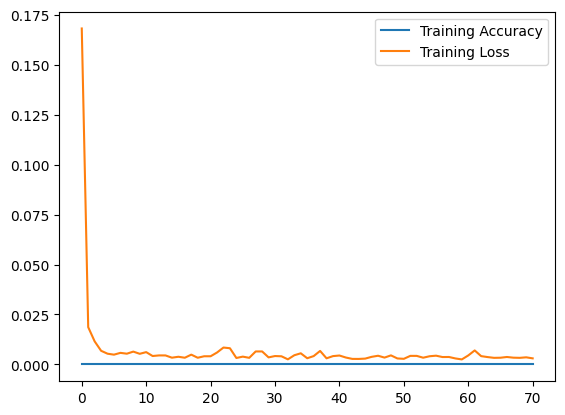

In [ ]:
loss=final['loss']
accuracy=final['accuracy']
plt.plot(range(71),accuracy,label='Training Accuracy')
plt.plot(range(71),loss,label='Training Loss')
plt.legend()
plt.show()

In [ ]:
n_features=1
test_predictions=[]
first_batch=train_data[-n_input:] # removes first 12 values
current_batch=first_batch.values.reshape(1,n_input,n_feature)
print(current_batch)
print(current_batch.shape)

[[[828]
  [778]
  [889]
  [902]
  [969]
  [947]
  [908]
  [867]
  [815]
  [812]
  [773]
  [813]]]
(1, 12, 1)


In [ ]:
current_batch[:,1:,:]

array([[[778],
        [889],
        [902],
        [969],
        [947],
        [908],
        [867],
        [815],
        [812],
        [773],
        [813]]])

In [ ]:
for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
test_predictions

[array([1.1925272], dtype=float32),
 array([0.44629353], dtype=float32),
 array([-0.3014467], dtype=float32),
 array([0.51554227], dtype=float32),
 array([0.14740145], dtype=float32),
 array([-0.11259945], dtype=float32),
 array([0.23285088], dtype=float32),
 array([0.06183418], dtype=float32),
 array([-0.17129415], dtype=float32),
 array([0.35231298], dtype=float32),
 array([0.2527468], dtype=float32),
 array([1.5072939], dtype=float32)]

In [ ]:
true_predictions=scale.inverse_transform(test_predictions)
true_predictions

array([[1001.42500019],
       [ 864.11801004],
       [ 726.53380609],
       [ 876.85977745],
       [ 809.12186718],
       [ 761.28170168],
       [ 824.84456182],
       [ 793.3774896 ],
       [ 750.4818759 ],
       [ 846.8255887 ],
       [ 828.50540948],
       [1059.34208488]])

In [ ]:
test_data_inverse=scale.inverse_transform(test_data)
test_data_inverse

array([[154238.],
       [144670.],
       [164910.],
       [166934.],
       [178526.],
       [173190.],
       [165646.],
       [158654.],
       [151110.],
       [152950.],
       [147430.],
       [155894.]])

In [ ]:
pd.DataFrame({'True Values':test_data_inverse[:,0],'Predicted Values':true_predictions[:,0]})

,True Values,Predicted Values
0,154238.0,1001.425000
1,144670.0,864.118010
2,164910.0,726.533806
3,166934.0,876.859777
4,178526.0,809.121867
5,173190.0,761.281702
6,165646.0,824.844562
7,158654.0,793.377490
8,151110.0,750.481876
9,152950.0,846.825589


# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Camerin DSML/alcohol_sale.csv',parse_dates=True,index_col='DATE')
data

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-12-01,15504
2019-01-01,10768
2019-02-01,11134


In [ ]:
train_data=data[:200]
test_data=data[200:]

In [ ]:
scale=MinMaxScaler()
scaled_train_data=scale.fit_transform(train_data)
scaled_test_data=scale.fit_transform(test_data)

In [ ]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(200, 1)
(128, 1)


In [ ]:
n_input=12
n_feature=1
generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,batch_size=10,length=n_input)

In [ ]:
x,y=generator[0]
print(x.flatten(),y)

[0.06084731 0.06070515 0.13804379 0.21794143 0.16917828 0.2129656
 0.2040091  0.15723628 0.15567245 0.17458061 0.17187944 0.27082741
 0.06070515 0.13804379 0.21794143 0.16917828 0.2129656  0.2040091
 0.15723628 0.15567245 0.17458061 0.17187944 0.27082741 0.
 0.13804379 0.21794143 0.16917828 0.2129656  0.2040091  0.15723628
 0.15567245 0.17458061 0.17187944 0.27082741 0.         0.03269832
 0.21794143 0.16917828 0.2129656  0.2040091  0.15723628 0.15567245
 0.17458061 0.17187944 0.27082741 0.         0.03269832 0.16050611
 0.16917828 0.2129656  0.2040091  0.15723628 0.15567245 0.17458061
 0.17187944 0.27082741 0.         0.03269832 0.16050611 0.19135627
 0.2129656  0.2040091  0.15723628 0.15567245 0.17458061 0.17187944
 0.27082741 0.         0.03269832 0.16050611 0.19135627 0.18140461
 0.2040091  0.15723628 0.15567245 0.17458061 0.17187944 0.27082741
 0.         0.03269832 0.16050611 0.19135627 0.18140461 0.23670742
 0.15723628 0.15567245 0.17458061 0.17187944 0.27082741 0.
 0.03269832 0

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))
model.add(Dropout(0.2))

model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=model.fit(generator,epochs=60)

Epoch 1/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.0018 - loss: 0.2661     
Epoch 2/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0025 - loss: 0.1039
Epoch 3/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0077 - loss: 0.0236
Epoch 4/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0078 - loss: 0.0148
Epoch 5/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 5.3191e-04 - loss: 0.0129
Epoch 6/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0131 - loss: 0.0151
Epoch 7/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0039 - loss: 0.0135
Epoch 8/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0131 - loss: 0.0122
Epoch 9/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0106 - loss: 0.0174
Epoch 10/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0051 - loss: 0.0115
Epoch 11/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0011 - loss: 0.0174    
Epoch 12/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accurac

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
final['accuracy'][-1]

0.005319148767739534

In [ ]:
final['loss'][-1]

0.004612750839442015

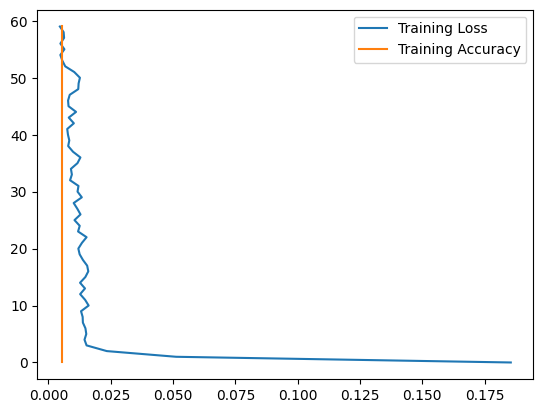

In [ ]:
loss=final['loss']
accuracy=final['accuracy']
plt.plot(loss,range(60),label='Training Loss')
plt.plot(accuracy,range(60),label='Training Accuracy')
plt.legend()
plt.show()

In [ ]:
n_features=1
test_prediction=[]
first_batch=train_data[-n_input:]
current_batch=first_batch.values.reshape(1,n_input,n_feature)
print(current_batch)
print(current_batch.shape)

[[[ 8123]
  [ 9649]
  [ 9390]
  [10065]
  [ 7093]
  [ 7483]
  [ 8365]
  [ 8895]
  [ 9794]
  [ 9977]
  [ 9553]
  [ 9375]]]
(1, 12, 1)


In [ ]:
current_batch[:,1:,:]

array([[[ 9649],
        [ 9390],
        [10065],
        [ 7093],
        [ 7483],
        [ 8365],
        [ 8895],
        [ 9794],
        [ 9977],
        [ 9553],
        [ 9375]]])

In [ ]:
for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]

  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━

In [ ]:
test_prediction

[array([337649.72], dtype=float32),
 array([491865.34], dtype=float32),
 array([556730.9], dtype=float32),
 array([597899.94], dtype=float32),
 array([362948.06], dtype=float32),
 array([370578.], dtype=float32),
 array([807770.2], dtype=float32),
 array([1426669.1], dtype=float32),
 array([2447539.8], dtype=float32),
 array([4070013.], dtype=float32),
 array([5723453.], dtype=float32),
 array([10209112.], dtype=float32),
 array([18751192.], dtype=float32),
 array([31178808.], dtype=float32),
 array([36955012.], dtype=float32),
 array([40446536.], dtype=float32),
 array([19275680.], dtype=float32),
 array([26926068.], dtype=float32),
 array([54488876.], dtype=float32),
 array([1.0090337e+08], dtype=float32),
 array([1.1288702e+08], dtype=float32),
 array([1.4429312e+08], dtype=float32),
 array([1.8034394e+08], dtype=float32),
 array([5.879173e+08], dtype=float32),
 array([1.03542976e+09], dtype=float32),
 array([1.8479432e+09], dtype=float32),
 array([2.1540698e+09], dtype=float32),
 a

In [ ]:
true_predictions=scale.inverse_transform(test_prediction)
true_predictions

array([[3.02062094e+09],
       [4.40023392e+09],
       [4.98052097e+09],
       [5.34881940e+09],
       [3.24693993e+09],
       [3.31519735e+09],
       [7.22631866e+09],
       [1.27629886e+10],
       [2.18956972e+10],
       [3.64103429e+10],
       [5.12020171e+10],
       [9.13307225e+10],
       [1.67748170e+11],
       [2.78925623e+11],
       [3.30599544e+11],
       [3.61834718e+11],
       [1.72440240e+11],
       [2.40880611e+11],
       [4.87457491e+11],
       [9.02681537e+11],
       [1.00988732e+12],
       [1.29084626e+12],
       [1.61335686e+12],
       [5.25950828e+12],
       [9.26295464e+12],
       [1.65316996e+13],
       [1.92703081e+13],
       [2.34447447e+13],
       [9.01272543e+12],
       [1.25544311e+13],
       [1.95332249e+13],
       [4.36999246e+13],
       [7.01843993e+13],
       [1.22864590e+14],
       [1.94555948e+14],
       [3.55681995e+14],
       [4.86627260e+14],
       [9.30726647e+14],
       [1.18875114e+15],
       [1.51479936e+15],


In [ ]:
test_data_inverse=scale.inverse_transform(test_data)
test_data_inverse

array([[8.25334080e+07],
       [8.90013660e+07],
       [7.83556260e+07],
       [9.69722520e+07],
       [6.50081940e+07],
       [6.77993460e+07],
       [7.77294060e+07],
       [8.19698100e+07],
       [8.38216320e+07],
       [9.09605400e+07],
       [8.50561800e+07],
       [7.98317160e+07],
       [8.29538700e+07],
       [8.11915080e+07],
       [8.00643120e+07],
       [9.70080360e+07],
       [5.86744260e+07],
       [6.69315840e+07],
       [8.47699080e+07],
       [8.43136620e+07],
       [8.36606040e+07],
       [9.44047500e+07],
       [8.12094000e+07],
       [8.29628160e+07],
       [8.42778780e+07],
       [8.42152560e+07],
       [8.82677940e+07],
       [1.02482988e+08],
       [6.17429040e+07],
       [7.16998020e+07],
       [8.79636300e+07],
       [8.30343840e+07],
       [8.91713400e+07],
       [1.01489982e+08],
       [8.14688340e+07],
       [9.36622320e+07],
       [9.02269680e+07],
       [8.59955100e+07],
       [9.24008460e+07],
       [1.02733476e+08],


In [ ]:
pd.DataFrame({'True Values':test_data_inverse[:,0],'Predicted Values':true_predictions[:,0]})

,True Values,Predicted Values
0,82533408.0,3.020621e+09
1,89001366.0,4.400234e+09
2,78355626.0,4.980521e+09
3,96972252.0,5.348819e+09
4,65008194.0,3.246940e+09
...,...,...
123,138705342.0,6.224780e+27
124,96337086.0,1.487683e+27
125,99611322.0,4.315258e+27
126,113200296.0,8.643179e+27


# **Example 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Camerin DSML/IBM_2006-01-01_to_2018-01-01.csv',parse_dates=True,index_col='Date')
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM


In [ ]:
data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Name,object


In [ ]:
print(data[:'2016'].shape)
print(data['2017':].shape)

(2769, 6)
(251, 6)


In [ ]:
train_data=data[:'2016'].iloc[:,1:2]
test_data=data['2017':].iloc[:,1:2]

In [ ]:
train_data

,High
Date,
2006-01-03,82.55
2006-01-04,82.50
2006-01-05,82.90
2006-01-06,85.03
2006-01-09,84.25
...,...
2016-12-23,167.49
2016-12-27,167.98
2016-12-28,167.74


In [ ]:
test_data

,High
Date,
2017-01-03,167.87
2017-01-04,169.87
2017-01-05,169.39
2017-01-06,169.92
2017-01-09,169.80
...,...
2017-12-22,153.00
2017-12-26,153.86
2017-12-27,153.18


In [ ]:
scale=MinMaxScaler()
scaled_train_data=scale.fit_transform(train_data)
scaled_test_data=scale.fit_transform(test_data)

In [ ]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(2769, 1)
(251, 1)


In [ ]:
n_input=12
n_feature=1
generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,batch_size=10,length=n_input)

In [ ]:
x,y=generator[0] # x stores input values and y the corresponding output(n_input,n_feature)
print(x.flatten(),y)

[0.06065089 0.06029868 0.06311637 0.0781206  0.07262609 0.07171034
 0.07657087 0.07058326 0.0669907  0.06494787 0.075796   0.07361229
 0.06029868 0.06311637 0.0781206  0.07262609 0.07171034 0.07657087
 0.07058326 0.0669907  0.06494787 0.075796   0.07361229 0.06417301
 0.06311637 0.0781206  0.07262609 0.07171034 0.07657087 0.07058326
 0.0669907  0.06494787 0.075796   0.07361229 0.06417301 0.05621302
 0.0781206  0.07262609 0.07171034 0.07657087 0.07058326 0.0669907
 0.06494787 0.075796   0.07361229 0.06417301 0.05621302 0.05783319
 0.07262609 0.07171034 0.07657087 0.07058326 0.0669907  0.06494787
 0.075796   0.07361229 0.06417301 0.05621302 0.05783319 0.05409975
 0.07171034 0.07657087 0.07058326 0.0669907  0.06494787 0.075796
 0.07361229 0.06417301 0.05621302 0.05783319 0.05409975 0.05431107
 0.07657087 0.07058326 0.0669907  0.06494787 0.075796   0.07361229
 0.06417301 0.05621302 0.05783319 0.05409975 0.05431107 0.05515638
 0.07058326 0.0669907  0.06494787 0.075796   0.07361229 0.0641730

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))
model.add(Dropout(0.2))

model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
f=model.fit(generator,epochs=70)

Epoch 1/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 9.4269e-04 - loss: 0.0865
Epoch 2/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.5083e-04 - loss: 0.0045
Epoch 3/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 9.8930e-04 - loss: 0.0040
Epoch 4/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 3.0254e-04 - loss: 0.0033
Epoch 5/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0018 - loss: 0.0031
Epoch 6/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.2026e-04 - loss: 0.0027
Epoch 7/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 5.0562e-04 - loss: 0.0030
Epoch 8/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0011 - loss: 0.0024
Epoch 9/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0017 - loss: 0.0023
Epoch 10/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 5.5943e-04 - loss: 0.0024
Epoch 11/70
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 3.7716e-04 - loss: 0.0024
Epoch 12/70
276/276

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
final['accuracy'][-1]

0.0007254261872731149

In [ ]:
final['loss'][-1]

0.0011110258055850863

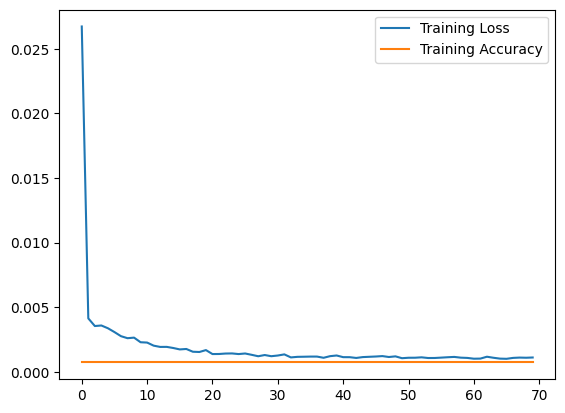

In [ ]:
loss=final['loss']
accuracy=final['accuracy']
plt.plot(range(70),loss,label='Training Loss')
plt.plot(range(70),accuracy,label='Training Accuracy')
plt.legend()
plt.show()

In [ ]:
n_features=1
test_prediction=[]
first_batch=train_data[-n_input:]
current_batch=first_batch.values.reshape(1,n_input,n_features)
print(current_batch)
print(current_batch.shape)

[[[169.89]
  [169.85]
  [169.11]
  [167.26]
  [168.25]
  [167.94]
  [168.23]
  [167.49]
  [167.98]
  [167.74]
  [166.99]
  [166.7 ]]]
(1, 12, 1)


In [ ]:
current_batch[:,1:,:]

array([[[169.85],
        [169.11],
        [167.26],
        [168.25],
        [167.94],
        [168.23],
        [167.49],
        [167.98],
        [167.74],
        [166.99],
        [166.7 ]]])

In [ ]:
for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]

  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

In [ ]:
test_prediction

[array([11.083431], dtype=float32),
 array([0.49370217], dtype=float32),
 array([-22.677769], dtype=float32),
 array([-48.588905], dtype=float32),
 array([-59.94918], dtype=float32),
 array([-53.48239], dtype=float32),
 array([-68.96842], dtype=float32),
 array([-68.07391], dtype=float32),
 array([-95.77701], dtype=float32),
 array([-98.549736], dtype=float32),
 array([-147.03041], dtype=float32),
 array([-139.92616], dtype=float32),
 array([-108.58864], dtype=float32),
 array([-64.81646], dtype=float32),
 array([-177.99602], dtype=float32),
 array([-235.7481], dtype=float32),
 array([-241.66716], dtype=float32),
 array([-441.10852], dtype=float32),
 array([-447.7394], dtype=float32),
 array([-747.7388], dtype=float32),
 array([-665.6203], dtype=float32),
 array([-448.77682], dtype=float32),
 array([-1022.84595], dtype=float32),
 array([-1486.5709], dtype=float32),
 array([-1400.3477], dtype=float32),
 array([-1266.8173], dtype=float32),
 array([-2441.8655], dtype=float32),
 array([-23

In [ ]:
true_predictions=scale.inverse_transform(test_prediction)
true_predictions

array([[ 6.10024982e+02],
       [ 1.61338161e+02],
       [-8.20437060e+02],
       [-1.91829192e+03],
       [-2.39962678e+03],
       [-2.12562892e+03],
       [-2.78177204e+03],
       [-2.74387172e+03],
       [-3.91765183e+03],
       [-4.03513232e+03],
       [-6.08925850e+03],
       [-5.78825151e+03],
       [-4.46048061e+03],
       [-2.60585340e+03],
       [-7.40127126e+03],
       [-9.84822669e+03],
       [-1.00990176e+04],
       [-1.85493480e+04],
       [-1.88302988e+04],
       [-3.15412717e+04],
       [-2.80619121e+04],
       [-1.88742541e+04],
       [-4.31975628e+04],
       [-6.28455900e+04],
       [-5.91923102e+04],
       [-5.35346273e+04],
       [-1.03321420e+05],
       [-9.85284279e+04],
       [-6.61290323e+04],
       [-1.41405389e+05],
       [-1.43333224e+05],
       [-6.13261869e+04],
       [ 1.73773396e+03],
       [-4.19322008e+03],
       [-2.90469391e+03],
       [ 4.42630202e+03],
       [ 1.63600193e+03],
       [ 3.19787556e+03],
       [ 1.8

In [ ]:
test_data_inverse=scale.inverse_transform(test_data)
test_data_inverse

array([[7253.0719],
       [7337.8119],
       [7317.4743],
       [7339.9304],
       [7334.846 ],
       [7262.3933],
       [7248.4112],
       [7259.0037],
       [7278.9176],
       [7266.2066],
       [7283.5783],
       [7235.2765],
       [7370.4368],
       [7396.2825],
       [7597.54  ],
       [7735.2425],
       [7719.5656],
       [7733.124 ],
       [7642.8759],
       [7579.7446],
       [7584.829 ],
       [7553.8989],
       [7611.9458],
       [7596.6926],
       [7708.5494],
       [7661.095 ],
       [7673.806 ],
       [7719.1419],
       [7762.783 ],
       [7772.5281],
       [7848.3704],
       [7885.2323],
       [7833.5409],
       [7800.4923],
       [7823.7958],
       [7872.945 ],
       [7830.1513],
       [7819.9825],
       [7793.7131],
       [7875.0635],
       [7846.6756],
       [7822.9484],
       [7808.9663],
       [7821.6773],
       [7807.2715],
       [7735.2425],
       [7745.4113],
       [7684.8222],
       [7632.2834],
       [7609.4036],


In [ ]:
a=pd.DataFrame({'True Values':test_data_inverse[:,0],'Predicted Values':true_predictions[:,0]})
a

,True Values,Predicted Values
0,7253.0719,6.100250e+02
1,7337.8119,1.613382e+02
2,7317.4743,-8.204371e+02
3,7339.9304,-1.918292e+03
4,7334.8460,-2.399627e+03
...,...,...
246,6623.0300,2.485148e+11
247,6659.4682,6.702518e+11
248,6630.6566,-1.253130e+10
249,6670.4844,8.181481e+11


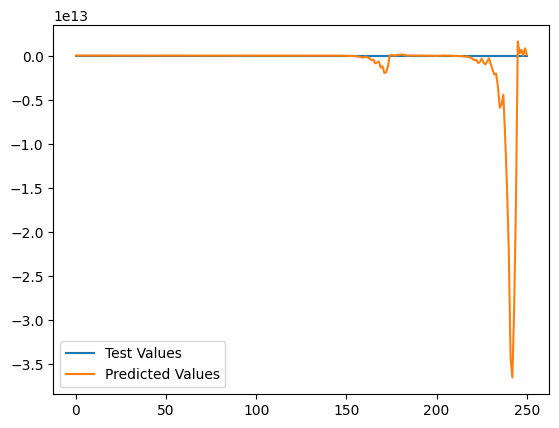

In [ ]:
plt.plot(range(len(test_data)),a['True Values'],label='Test Values')
plt.plot(range(len(test_data)),a['Predicted Values'],label='Predicted Values')
plt.legend()
plt.show()